# Differential Expressed Analysis of RNASeq data

Problem: the gene expression values are in TPM, which means that samples are not comparable; values are only comparable within the same sample

In [10]:
import os
import pandas as pd
import numpy as np
import scipy
from sklearn.feature_selection import SelectPercentile, f_classif, SelectKBest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [11]:
data_folder = 'excelRNAseq/UPDATE'

In [12]:
datafile = os.path.join(data_folder, 'GREAT_TPM_MODEL_GENES_LOG.csv')

In [13]:
metafile = os.path.join(data_folder, 'RNAseq_metadata.xlsx')

In [14]:
data = pd.read_csv(datafile, index_col=0)
data.shape

(6018, 162)

In [16]:
metadata = pd.read_excel(metafile, index_col=0)
metadata

,sample,description,study,tissue,platform,Local,year
ENA,,,,,,,
SRR5453852,GSM2579822,NINW 0 hpi rep1,GSE97900,stem,Illumina Hiseq 2500,California,2017
SRR5453853,GSM2579823,NINW 0 hpi rep2,GSE97900,stem,Illumina Hiseq 2500,California,2017
SRR5453854,GSM2579824,NINW 0 hpi rep3,GSE97900,stem,Illumina Hiseq 2500,California,2017
SRR5453855,GSM2579825,NINW 3 hpi rep1,GSE97900,stem,Illumina Hiseq 2500,California,2017
SRR5453856,GSM2579826,NINW 3 hpi rep2,GSE97900,stem,Illumina Hiseq 2500,California,2017
...,...,...,...,...,...,...,...
SRR5560622,GSM2627818,time 11 rep2,GSE98923,berry_mature,Illumina HiSeq 1000,California,2014
SRR5560623,GSM2627819,time 11 rep3,GSE98923,berry_mature,Illumina HiSeq 1000,California,2014
SRR5560624,GSM2627820,time 12 rep1,GSE98923,berry_mature,Illumina HiSeq 1000,California,2014


In [7]:
y = metadata['tissue']

In [19]:
datat = data.transpose()
datat.shape

(162, 6018)

In [20]:
datat.hist()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001EC92CA2EE0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
vt = VarianceThreshold(0.1)
data_filtered = vt.fit_transform(datat)
cols_inds = vt.get_support(indices=True)
df_data_filtered = pd.DataFrame(data_filtered, index=datat.index, columns=datat.columns[cols_inds])
df_data_filtered.shape

# DEA with SELECTKBEST

In [34]:
selector = SelectKBest(f_classif, k=50)

In [75]:
data_array = selector.fit_transform(datat, y)

cols = selector.get_support(indices=True)

diff_genes = datat.iloc[:, cols].columns
print(diff_genes)

new_data = pd.DataFrame(data_array, index=datat.index, columns=datat.iloc[:, cols].columns)
new_data

# print(cols)

# colnames = datat.iloc[:, cols].columns
# print(colnames)

# genes_diff = np.where(selector.pvalues_<0.01)
# print(datat.columns[genes_diff])

Index(['Vitvi01g00284', 'Vitvi01g00557', 'Vitvi01g00558', 'Vitvi01g01071',
       'Vitvi02g00671', 'Vitvi02g01349', 'Vitvi04g00262', 'Vitvi04g01007',
       'Vitvi04g01185', 'Vitvi04g01186', 'Vitvi04g01720', 'Vitvi04g04523',
       'Vitvi05g00421', 'Vitvi05g01294', 'Vitvi05g01741', 'Vitvi05g01869',
       'Vitvi06g00153', 'Vitvi06g00498', 'Vitvi06g00758', 'Vitvi07g00125',
       'Vitvi07g00187', 'Vitvi07g00324', 'Vitvi07g00505', 'Vitvi07g01342',
       'Vitvi07g02119', 'Vitvi07g02123', 'Vitvi08g00151', 'Vitvi08g01335',
       'Vitvi09g01282', 'Vitvi10g01153', 'Vitvi11g00276', 'Vitvi11g01184',
       'Vitvi11g04050', 'Vitvi12g00080', 'Vitvi12g00493', 'Vitvi13g01634',
       'Vitvi14g00405', 'Vitvi14g01281', 'Vitvi14g01739', 'Vitvi14g01809',
       'Vitvi15g00885', 'Vitvi16g00042', 'Vitvi16g04295', 'Vitvi16g04296',
       'Vitvi17g04269', 'Vitvi18g00993', 'Vitvi18g01385', 'Vitvi18g01504',
       'Vitvi18g02147', 'Vitvi18g02743'],
      dtype='object')


,Vitvi01g00284,Vitvi01g00557,Vitvi01g00558,Vitvi01g01071,Vitvi02g00671,Vitvi02g01349,Vitvi04g00262,Vitvi04g01007,Vitvi04g01185,Vitvi04g01186,...,Vitvi15g00885,Vitvi16g00042,Vitvi16g04295,Vitvi16g04296,Vitvi17g04269,Vitvi18g00993,Vitvi18g01385,Vitvi18g01504,Vitvi18g02147,Vitvi18g02743
SRR5453852,0.137504,0.443607,3.933573,0.250962,0.226509,3.628774,5.189825,0.137504,0.389567,0.422233,...,0.201634,3.667892,0.298658,0.137504,0.344828,5.434628,0.137504,0.263034,0.137504,5.690417
SRR5453853,0.137504,0.516015,4.587965,0.137504,0.214125,3.295723,5.206331,0.137504,0.678072,0.321928,...,0.137504,3.938286,0.137504,0.137504,0.238787,5.004951,0.137504,0.985500,0.137504,5.939697
SRR5453854,0.137504,0.344828,4.159468,0.250962,0.226509,3.513491,5.073392,0.137504,0.695994,0.238787,...,0.201634,3.635754,0.137504,0.137504,0.344828,5.775841,0.356144,0.941106,0.137504,6.796234
SRR5453855,0.137504,0.536053,4.220330,0.250962,0.137504,3.775051,4.510962,0.250962,0.879706,0.333424,...,0.201634,3.769772,0.137504,0.137504,0.757023,4.575917,0.137504,0.594549,0.137504,6.207112
SRR5453856,0.137504,0.137504,4.405312,0.137504,0.214125,3.147307,4.871351,0.137504,0.613532,0.226509,...,0.137504,3.642702,0.286881,0.137504,0.411426,5.290940,0.137504,0.367371,0.137504,6.570159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR5560622,0.137504,0.400538,0.201634,0.214125,0.176323,0.137504,0.137504,0.137504,0.454176,0.176323,...,0.594549,0.333424,0.137504,0.137504,0.189034,0.176323,0.137504,0.137504,0.137504,0.137504
SRR5560623,0.137504,0.238787,0.321928,0.378512,0.137504,0.137504,0.137504,0.137504,0.773996,0.226509,...,0.516015,0.411426,0.137504,0.137504,0.189034,0.137504,0.137504,0.137504,0.137504,0.226509
SRR5560624,0.137504,0.632268,0.310340,0.495695,0.163499,0.150560,0.137504,0.137504,0.687061,0.201634,...,0.333424,0.526069,0.137504,0.137504,0.333424,0.137504,0.137504,0.176323,0.137504,0.163499
SRR5560625,0.137504,0.536053,0.263034,0.137504,0.176323,0.137504,0.137504,0.137504,0.475085,0.137504,...,0.367371,0.555816,0.137504,0.137504,0.238787,0.263034,0.137504,0.137504,0.137504,0.137504


In [76]:
new_data_group = new_data.groupby(metadata['tissue']).mean()
new_data_group

,Vitvi01g00284,Vitvi01g00557,Vitvi01g00558,Vitvi01g01071,Vitvi02g00671,Vitvi02g01349,Vitvi04g00262,Vitvi04g01007,Vitvi04g01185,Vitvi04g01186,...,Vitvi15g00885,Vitvi16g00042,Vitvi16g04295,Vitvi16g04296,Vitvi17g04269,Vitvi18g00993,Vitvi18g01385,Vitvi18g01504,Vitvi18g02147,Vitvi18g02743
tissue,,,,,,,,,,,,,,,,,,,,,
berry_green,0.168200,0.337555,0.587776,0.607135,0.364908,0.339548,0.137504,0.141779,0.941262,0.235908,...,1.007253,0.269350,0.139481,0.137504,1.190968,0.274229,0.161683,0.355174,0.137504,0.436368
berry_mature,0.157397,0.366332,0.323814,0.232244,0.195513,0.142524,0.138191,0.137504,0.524736,0.159254,...,0.498737,0.293971,0.137504,0.137504,0.337689,0.178990,0.137504,0.154989,0.137504,0.197580
leaf,3.207475,5.382741,4.566512,5.607287,3.591684,0.386781,0.157857,5.262208,5.956700,2.744850,...,6.083302,0.152043,5.499805,5.744447,7.149819,1.840971,6.201307,6.056277,4.112499,0.454040
stem,0.144849,0.438210,4.119338,0.211717,0.206662,3.563463,4.678351,0.176957,0.726046,0.346971,...,0.240786,3.463492,0.181071,0.256941,0.684882,5.496624,0.177148,0.604306,0.137504,6.224939


Text(0.5, 0, 'log2 gene expression')

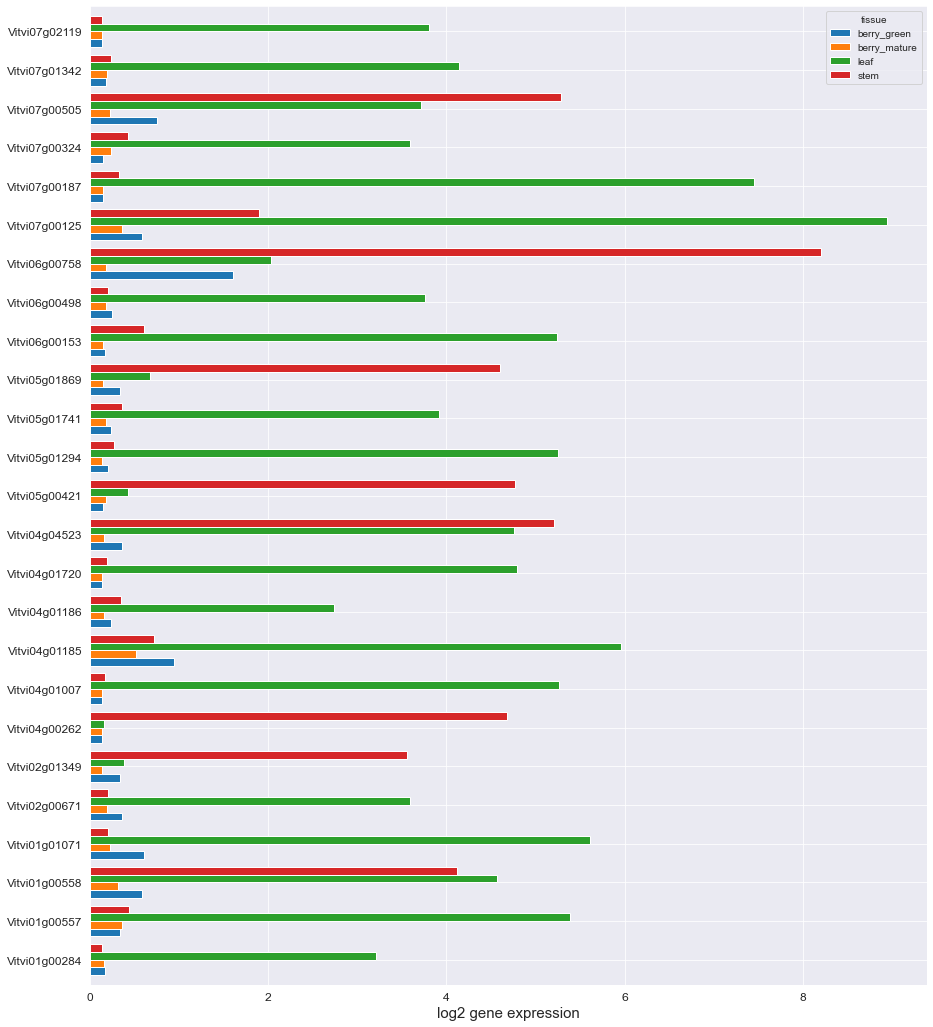

In [61]:
# plt.figure(figsize=(10,8))
ax = new_data_group.iloc[:, :25].transpose().plot.barh(figsize=(15, 18),width=0.8, fontsize=12)
ax.set_xlabel("log2 gene expression", fontsize=15)
# new_data_group.iloc[:, :25].transpose().plot.title('Gene expression', fontsize=20)

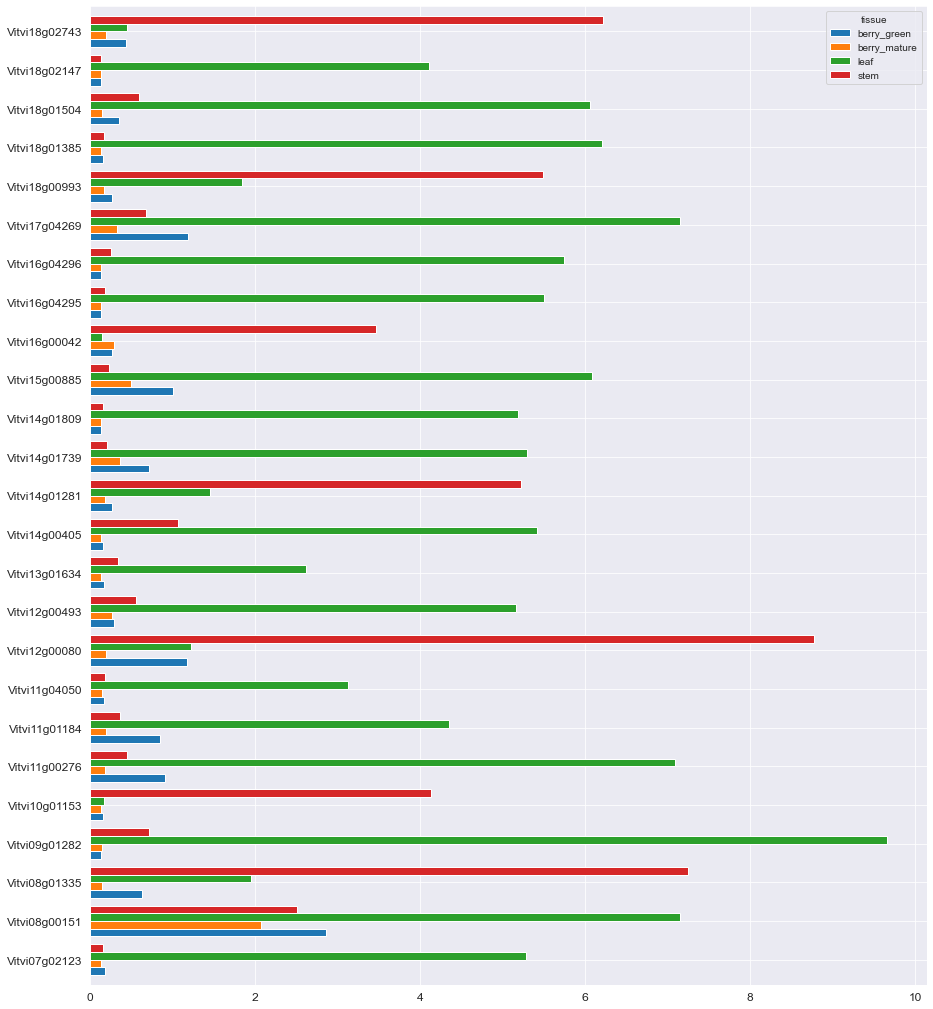

In [56]:
new_data_group.iloc[:, 25:].transpose().plot.barh(figsize=(15, 18),width=0.8,  fontsize=12)

In [24]:
import seaborn as sns

In [83]:
new_data_group.transpose().shape

(50, 4)

[Text(46.10937499999999, 0.5, 'genes'), Text(0.5, 109.109375, 'tissues')]

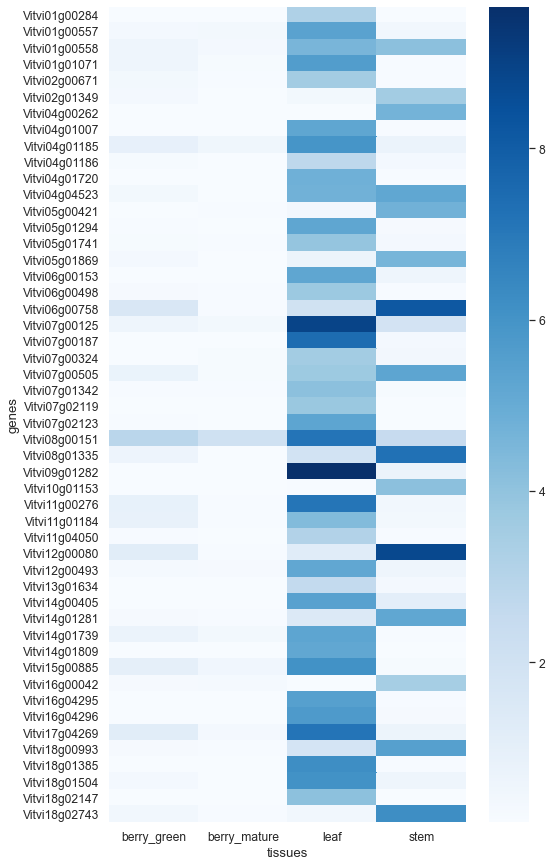

In [123]:
plt.figure(figsize = (8, 15))
sns.set(font_scale=1.1)
s = sns.heatmap(new_data_group.transpose(), cmap='Blues')
s.set(xlabel='tissues', ylabel='genes')

In [61]:
for gene in diff_genes:
    data_gene = datat.loc[:, gene]
    data_stem = data_gene[metadata["tissue"]=="stem"]
    data_leaf = data_gene[metadata["tissue"]=="leaf"]
    data_green = data_gene[metadata["tissue"]=="berry_green"]
    data_mature = data_gene[metadata["tissue"]=="berry_mature"]

    all_tissues = [data_stem, data_leaf, data_green, data_mature]
    plt.boxplot(all_tissues)
    plt.xticks([1,2, 3, 4], ["stem", "leaf", "green", "mature"])
    plt.title(gene)
    fig_path = os.path.join(data_folder, 'diff_genes', gene + '.png')
    plt.savefig(fig_path)
    plt.clf()

C:\Users\BiSBII\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\BiSBII\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\BiSBII\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is

<Figure size 432x288 with 0 Axes>

# DEA with t-test (pairwise)

In [94]:
from scipy.stats import ttest_ind

In [99]:
#select the control and drought samples (excluding the target column)
stem = datat[metadata["tissue"] == "stem"]
leaf = datat[metadata["tissue"] == "leaf"]
berry_g = datat[metadata["tissue"] == "berry_green"]
berry_m = datat[metadata["tissue"] == "berry_mature"]
leaf.shape

(21, 6018)

## LEAF vs STEM

In [100]:
pvalues = scipy.stats.ttest_ind(stem, leaf)[1]
df_pvalues = pd.DataFrame(pvalues, index=datat.columns, columns=['pvalues'])
genes_dif = df_pvalues[df_pvalues['pvalues']<0.01].sort_values(by=['pvalues']).index[:50]
genes_dif

<ipython-input-100-e1ddd1074d06>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pvalues = scipy.stats.ttest_ind(stem, leaf)[1]


Index(['Vitvi11g01516', 'Vitvi16g00002', 'Vitvi19g00007', 'Vitvi14g01809',
       'Vitvi02g00726', 'Vitvi16g00789', 'Vitvi11g00398', 'Vitvi06g00498',
       'Vitvi14g04632', 'Vitvi10g00524', 'Vitvi12g04138', 'Vitvi04g01007',
       'Vitvi02g00395', 'Vitvi18g00642', 'Vitvi09g00264', 'Vitvi08g02288',
       'Vitvi11g00460', 'Vitvi06g00149', 'Vitvi08g01253', 'Vitvi07g01255',
       'Vitvi16g04296', 'Vitvi10g02295', 'Vitvi18g00529', 'Vitvi14g00445',
       'Vitvi14g04495', 'Vitvi18g00466', 'Vitvi11g00276', 'Vitvi13g00254',
       'Vitvi14g00066', 'Vitvi18g02743', 'Vitvi03g00077', 'Vitvi16g04295',
       'Vitvi14g01739', 'Vitvi10g00020', 'Vitvi06g00119', 'Vitvi04g01082',
       'Vitvi11g01184', 'Vitvi05g00442', 'Vitvi12g00480', 'Vitvi07g00741',
       'Vitvi17g04269', 'Vitvi06g01444', 'Vitvi03g00780', 'Vitvi05g01294',
       'Vitvi04g01185', 'Vitvi11g01290', 'Vitvi19g00009', 'Vitvi10g00557',
       'Vitvi15g01503', 'Vitvi07g00187'],
      dtype='object')

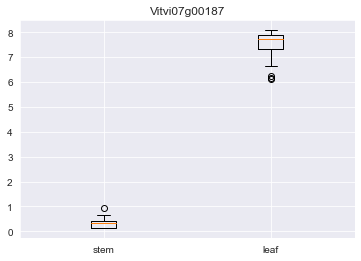

In [104]:
data_gene = datat.loc[:, 'Vitvi07g00187']
data_stem = data_gene[metadata["tissue"]=="stem"]
data_leaf = data_gene[metadata["tissue"]=="leaf"]

all_tissues = [data_stem, data_leaf]
plt.boxplot(all_tissues)
plt.xticks([1,2], ["stem", "leaf"])
plt.title('Vitvi07g00187')
# fig_path = os.path.join(data_folder, 'diff_genes', gene + '.png')
# plt.savefig(fig_path)
# plt.clf()
plt.show()

## LEAF VS BERRY GREEN

In [105]:
pvalues = scipy.stats.ttest_ind(leaf, berry_g)[1]
df_pvalues = pd.DataFrame(pvalues, index=datat.columns, columns=['pvalues'])
genes_dif = df_pvalues[df_pvalues['pvalues']<0.01].sort_values(by=['pvalues']).index[:50]
genes_dif

<ipython-input-105-003c291a28a3>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pvalues = scipy.stats.ttest_ind(leaf, berry_g)[1]


Index(['Vitvi14g01809', 'Vitvi06g00498', 'Vitvi16g04296', 'Vitvi04g01007',
       'Vitvi07g00125', 'Vitvi16g04295', 'Vitvi14g00405', 'Vitvi05g01294',
       'Vitvi07g00324', 'Vitvi07g00187', 'Vitvi07g02123', 'Vitvi06g00153',
       'Vitvi18g01504', 'Vitvi18g02147', 'Vitvi04g01186', 'Vitvi18g01385',
       'Vitvi12g00493', 'Vitvi18g00642', 'Vitvi04g01747', 'Vitvi04g00130',
       'Vitvi04g01185', 'Vitvi07g01848', 'Vitvi04g01720', 'Vitvi06g04173',
       'Vitvi11g01184', 'Vitvi07g02119', 'Vitvi13g01634', 'Vitvi10g00553',
       'Vitvi04g00870', 'Vitvi15g00915', 'Vitvi08g00151', 'Vitvi14g01763',
       'Vitvi09g01282', 'Vitvi02g00671', 'Vitvi05g01304', 'Vitvi11g00276',
       'Vitvi01g00557', 'Vitvi16g01149', 'Vitvi05g01741', 'Vitvi10g01568',
       'Vitvi10g01757', 'Vitvi11g00469', 'Vitvi16g01908', 'Vitvi13g00105',
       'Vitvi08g01098', 'Vitvi07g01342', 'Vitvi05g00675', 'Vitvi18g00204',
       'Vitvi03g00203', 'Vitvi04g00443'],
      dtype='object')

## LEAF VS BERRY_MATURE

In [106]:
#calculate pvalues and select the 50 most significative genes
pvalues = scipy.stats.ttest_ind(leaf, berry_g)[1]
df_pvalues = pd.DataFrame(pvalues, index=datat.columns, columns=['pvalues'])
genes_dif = df_pvalues[df_pvalues['pvalues']<0.01].sort_values(by=['pvalues']).index[:50]
genes_dif

<ipython-input-106-6208f3568461>:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pvalues = scipy.stats.ttest_ind(leaf, berry_g)[1]


Index(['Vitvi14g01809', 'Vitvi06g00498', 'Vitvi16g04296', 'Vitvi04g01007',
       'Vitvi07g00125', 'Vitvi16g04295', 'Vitvi14g00405', 'Vitvi05g01294',
       'Vitvi07g00324', 'Vitvi07g00187', 'Vitvi07g02123', 'Vitvi06g00153',
       'Vitvi18g01504', 'Vitvi18g02147', 'Vitvi04g01186', 'Vitvi18g01385',
       'Vitvi12g00493', 'Vitvi18g00642', 'Vitvi04g01747', 'Vitvi04g00130',
       'Vitvi04g01185', 'Vitvi07g01848', 'Vitvi04g01720', 'Vitvi06g04173',
       'Vitvi11g01184', 'Vitvi07g02119', 'Vitvi13g01634', 'Vitvi10g00553',
       'Vitvi04g00870', 'Vitvi15g00915', 'Vitvi08g00151', 'Vitvi14g01763',
       'Vitvi09g01282', 'Vitvi02g00671', 'Vitvi05g01304', 'Vitvi11g00276',
       'Vitvi01g00557', 'Vitvi16g01149', 'Vitvi05g01741', 'Vitvi10g01568',
       'Vitvi10g01757', 'Vitvi11g00469', 'Vitvi16g01908', 'Vitvi13g00105',
       'Vitvi08g01098', 'Vitvi07g01342', 'Vitvi05g00675', 'Vitvi18g00204',
       'Vitvi03g00203', 'Vitvi04g00443'],
      dtype='object')

In [107]:
pvalues = scipy.stats.ttest_ind(stem, berry_g)[1]
df_pvalues = pd.DataFrame(pvalues, index=datat.columns, columns=['pvalues'])
genes_dif = df_pvalues[df_pvalues['pvalues']<0.01].sort_values(by=['pvalues']).index[:50]
genes_dif

<ipython-input-107-c0163ca33def>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pvalues = scipy.stats.ttest_ind(stem, berry_g)[1]


Index(['Vitvi18g02743', 'Vitvi05g01869', 'Vitvi14g01281', 'Vitvi04g04523',
       'Vitvi10g01153', 'Vitvi02g01349', 'Vitvi18g00993', 'Vitvi16g00042',
       'Vitvi14g01783', 'Vitvi05g00421', 'Vitvi06g04173', 'Vitvi12g00080',
       'Vitvi02g00942', 'Vitvi11g00565', 'Vitvi11g01045', 'Vitvi02g00109',
       'Vitvi16g00002', 'Vitvi07g00127', 'Vitvi08g01335', 'Vitvi04g01746',
       'Vitvi06g00758', 'Vitvi04g00262', 'Vitvi02g00726', 'Vitvi04g02123',
       'Vitvi01g00458', 'Vitvi01g02001', 'Vitvi07g00505', 'Vitvi08g01058',
       'Vitvi14g01198', 'Vitvi08g01223', 'Vitvi02g01264', 'Vitvi13g02538',
       'Vitvi01g01036', 'Vitvi03g01085', 'Vitvi16g01560', 'Vitvi14g00149',
       'Vitvi07g00490', 'Vitvi01g00558', 'Vitvi06g04171', 'Vitvi07g02516',
       'Vitvi07g01723', 'Vitvi12g00231', 'Vitvi02g01427', 'Vitvi18g02378',
       'Vitvi14g01865', 'Vitvi05g01793', 'Vitvi04g01747', 'Vitvi01g01701',
       'Vitvi19g00410', 'Vitvi04g02306'],
      dtype='object')

In [108]:
pvalues = scipy.stats.ttest_ind(stem, berry_m)[1]
df_pvalues = pd.DataFrame(pvalues, index=datat.columns, columns=['pvalues'])
genes_dif = df_pvalues[df_pvalues['pvalues']<0.01].sort_values(by=['pvalues']).index[:50]
genes_dif

<ipython-input-108-bc650c7749b9>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pvalues = scipy.stats.ttest_ind(stem, berry_m)[1]


Index(['Vitvi06g00758', 'Vitvi03g01426', 'Vitvi12g00080', 'Vitvi03g00700',
       'Vitvi18g02743', 'Vitvi05g01869', 'Vitvi02g01728', 'Vitvi04g00880',
       'Vitvi02g01349', 'Vitvi04g00091', 'Vitvi14g01281', 'Vitvi04g04523',
       'Vitvi08g01058', 'Vitvi18g02741', 'Vitvi04g00367', 'Vitvi11g00175',
       'Vitvi12g00231', 'Vitvi07g00505', 'Vitvi17g00662', 'Vitvi02g00436',
       'Vitvi08g01335', 'Vitvi16g00002', 'Vitvi02g00395', 'Vitvi10g01153',
       'Vitvi08g00159', 'Vitvi18g00993', 'Vitvi14g04107', 'Vitvi16g00028',
       'Vitvi18g01097', 'Vitvi14g00305', 'Vitvi14g01865', 'Vitvi01g01719',
       'Vitvi09g00993', 'Vitvi07g02190', 'Vitvi01g01036', 'Vitvi01g00558',
       'Vitvi19g01048', 'Vitvi07g00665', 'Vitvi07g00127', 'Vitvi04g01402',
       'Vitvi16g00042', 'Vitvi02g01474', 'Vitvi07g01714', 'Vitvi03g00703',
       'Vitvi17g00484', 'Vitvi08g01776', 'Vitvi18g00363', 'Vitvi02g00942',
       'Vitvi03g00780', 'Vitvi08g01223'],
      dtype='object')

In [109]:
pvalues = scipy.stats.ttest_ind(berry_m, berry_g)[1]
df_pvalues = pd.DataFrame(pvalues, index=datat.columns, columns=['pvalues'])
genes_dif = df_pvalues[df_pvalues['pvalues']<0.01].sort_values(by=['pvalues']).index[:50]
genes_dif

<ipython-input-109-d89bfd309758>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pvalues = scipy.stats.ttest_ind(berry_m, berry_g)[1]


Index(['Vitvi01g00457', 'Vitvi04g02169', 'Vitvi17g00258', 'Vitvi07g01921',
       'Vitvi18g01571', 'Vitvi13g01766', 'Vitvi13g00507', 'Vitvi18g01703',
       'Vitvi19g00264', 'Vitvi01g00619', 'Vitvi10g00398', 'Vitvi06g01203',
       'Vitvi01g00621', 'Vitvi02g00086', 'Vitvi09g04497', 'Vitvi08g01574',
       'Vitvi18g01019', 'Vitvi06g00321', 'Vitvi06g01349', 'Vitvi05g00606',
       'Vitvi07g00047', 'Vitvi08g01676', 'Vitvi03g00048', 'Vitvi04g00148',
       'Vitvi19g01739', 'Vitvi08g00970', 'Vitvi18g02625', 'Vitvi17g00621',
       'Vitvi18g00523', 'Vitvi14g02474', 'Vitvi04g01611', 'Vitvi18g04221',
       'Vitvi11g00460', 'Vitvi05g00442', 'Vitvi11g00208', 'Vitvi14g01735',
       'Vitvi08g01777', 'Vitvi07g04666', 'Vitvi08g00684', 'Vitvi01g00115',
       'Vitvi06g00064', 'Vitvi04g00466', 'Vitvi04g01540', 'Vitvi07g00035',
       'Vitvi08g01301', 'Vitvi01g00214', 'Vitvi07g02553', 'Vitvi13g00864',
       'Vitvi13g01633', 'Vitvi16g00278'],
      dtype='object')

# DEA WITH DESEQ2: NORMALISED COUNTS

In [5]:
datafile = os.path.join(data_folder, 'RAW_counts', 'raw_counts_normalised.csv')

In [7]:
data_norm = pd.read_csv(datafile, index_col=0)
data_norm.head()

,SRR5453852,SRR5453853,SRR5453854,SRR5453855,SRR5453856,SRR5453857,SRR5453858,SRR5453859,SRR5453860,SRR5453861,...,SRR5560617,SRR5560618,SRR5560619,SRR5560620,SRR5560621,SRR5560622,SRR5560623,SRR5560624,SRR5560625,SRR5560626
Vitvi01g00571,1406.043963,1505.311122,1644.286275,2451.762094,1828.998708,1382.607532,1721.223413,1868.445222,1751.192089,1396.785224,...,2764.392211,2710.990319,2681.026642,2529.415744,3384.056099,3162.440667,3114.847163,3118.467576,3009.964940,3157.785654
Vitvi09g01562,4.521042,12.115180,8.084003,3.967253,3.782831,2.871459,0.000000,1.815787,2.592438,11.531767,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Vitvi09g00693,6730.324049,7244.877676,6384.745822,6863.346963,8657.008362,5952.534608,8727.265592,7717.096397,9551.839012,6591.846057,...,7412.865327,6597.111201,7119.856189,6407.961976,6948.606816,7798.771799,6766.278190,7016.707008,6822.944888,8290.944792
Vitvi10g00726,293.867709,363.455402,394.499362,513.759209,533.379147,376.161135,361.159760,417.631099,500.340597,343.070055,...,492.759621,449.991265,496.975392,467.383174,532.764307,561.786079,476.273612,482.243644,549.054805,521.611076
Vitvi15g00807,0.000000,3.028795,0.000000,0.000000,0.000000,0.000000,0.000000,1.815787,1.296219,1.441471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
deseq2_diff = ['Vitvi09g00264', 'Vitvi10g00524', 'Vitvi11g00398', 'Vitvi16g00002', 'Vitvi07g01255', 'Vitvi18g00466', 'Vitvi01g00816', 'Vitvi02g00680', 'Vitvi06g00150', 'Vitvi02g00726', 'Vitvi13g02538', 'Vitvi07g00734', 'Vitvi18g03250', 'Vitvi01g00458', 'Vitvi04g02306', 'Vitvi10g01066', 'Vitvi08g01406', 'Vitvi06g01718', 'Vitvi02g00942', 'Vitvi02g01474', 'Vitvi13g00701', 'Vitvi17g00484', 'Vitvi03g00780', 'Vitvi08g01058', 'Vitvi08g01223', 'Vitvi01g00455', 'Vitvi01g01520', 'Vitvi04g00267', 'Vitvi19g01739', 'Vitvi06g01518', 'Vitvi07g00125', 'Vitvi12g02374', 'Vitvi12g00050', 'Vitvi06g01269', 'Vitvi09g00653', 'Vitvi10g00835', 'Vitvi06g00153', 'Vitvi17g01391', 'Vitvi14g00154', 'Vitvi13g01966', 'Vitvi06g01444', 'Vitvi01g01538', 'Vitvi02g01241', 'Vitvi16g00733', 'Vitvi05g01543', 'Vitvi15g00821', 'Vitvi08g00947', 'Vitvi02g01003', 'Vitvi13g01766', 'Vitvi13g02416', 'Vitvi02g00083', 'Vitvi16g01365', 'Vitvi07g01412', 'Vitvi19g01793', 'Vitvi14g01873', 'Vitvi04g01385', 'Vitvi07g00426', 'Vitvi01g00882']

In [9]:
data_normt = data_norm.transpose()

In [37]:
for gene in diff_genes_norm:
    data_gene = data_normt.loc[:, gene]
    data_stem = data_gene[metadata["tissue"]=="stem"]
    data_leaf = data_gene[metadata["tissue"]=="leaf"]
    data_green = data_gene[metadata["tissue"]=="berry_green"]
    data_mature = data_gene[metadata["tissue"]=="berry_mature"]

    all_tissues = [data_stem, data_leaf, data_green, data_mature]
    plt.boxplot(all_tissues)
    plt.xticks([1,2, 3, 4], ["stem", "leaf", "green", "mature"])
    plt.title(gene)
    fig_path = os.path.join(data_folder, 'diff_genes_deseq2_norm', gene + '.png')
    plt.savefig(fig_path)
    plt.clf()

C:\Users\BiSBII\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\BiSBII\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\BiSBII\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is

<Figure size 432x288 with 0 Axes>

## GET reactions from diff genes

In [2]:
genes_diff_skb = ['Vitvi01g00284', 'Vitvi01g00557', 'Vitvi01g00558', 'Vitvi01g01071', 'Vitvi02g00671', 'Vitvi02g01349', 'Vitvi04g00262', 'Vitvi04g01007', 'Vitvi04g01185', 'Vitvi04g01186', 'Vitvi04g01720', 'Vitvi04g04523', 'Vitvi05g00421', 'Vitvi05g01294', 'Vitvi05g01741', 'Vitvi05g01869', 'Vitvi06g00153', 'Vitvi06g00498', 'Vitvi06g00758', 'Vitvi07g00125', 'Vitvi07g00187', 'Vitvi07g00324', 'Vitvi07g00505', 'Vitvi07g01342', 'Vitvi07g02119', 'Vitvi07g02123', 'Vitvi08g00151', 'Vitvi08g01335', 'Vitvi09g01282', 'Vitvi10g01153', 'Vitvi11g00276', 'Vitvi11g01184', 'Vitvi11g04050', 'Vitvi12g00080', 'Vitvi12g00493', 'Vitvi13g01634', 'Vitvi14g00405', 'Vitvi14g01281', 'Vitvi14g01739', 'Vitvi14g01809', 'Vitvi15g00885', 'Vitvi16g00042', 'Vitvi16g04295', 'Vitvi16g04296', 'Vitvi17g04269', 'Vitvi18g00993', 'Vitvi18g01385', 'Vitvi18g01504', 'Vitvi18g02147', 'Vitvi18g02743']

In [30]:
genes_diff_deseq2_2 = ['Vitvi08g01812', 'Vitvi16g01857', 'Vitvi13g02066', 'Vitvi18g02625', 'Vitvi15g00690', 'Vitvi10g00087', 'Vitvi13g01766', 'Vitvi11g00424', 'Vitvi04g01385', 'Vitvi17g00621', 'Vitvi19g01793', 'Vitvi05g00560', 'Vitvi13g00507', 'Vitvi19g00549', 'Vitvi06g00321', 'Vitvi10g00398', 'Vitvi15g00396', 'Vitvi13g02026', 'Vitvi14g01696', 'Vitvi05g00442', 'Vitvi14g01873', 'Vitvi01g00362', 'Vitvi02g00083', 'Vitvi09g00516', 'Vitvi13g01298', 'Vitvi17g00881', 'Vitvi02g01003', 'Vitvi13g02416', 'Vitvi04g01421', 'Vitvi05g00891', 'Vitvi07g01609', 'Vitvi07g01412', 'Vitvi16g01365', 'Vitvi01g00882', 'Vitvi02g01227', 'Vitvi05g00160', 'Vitvi03g00048', 'Vitvi14g01046', 'Vitvi19g02324', 'Vitvi05g00013', 'Vitvi08g01574', 'Vitvi07g01300', 'Vitvi07g00054', 'Vitvi11g00309', 'Vitvi08g01676', 'Vitvi02g00938', 'Vitvi19g00264', 'Vitvi04g00148', 'Vitvi14g02474', 'Vitvi01g00058']

In [3]:
modelfile = 'C:/Users/BiSBII/Documents/plantdb/reconstruction_results/vvinif2023/vvinif2023_FINAL.xml'

In [4]:
from cobra.io import read_sbml_model

model = read_sbml_model(modelfile)

model_genes = {}

for gene in model.genes:
    newid = gene.id.split('_')[0]
    model_genes[newid] = gene

In [44]:
info_genes = {}

for gene_dif in diff_genes_berries:
    try:
        gene_obj = model_genes[gene_dif]
        reactions = gene_obj.reactions
        pathways = []
        for r in reactions:
            groups = [(c.id, c.name) for c in model.get_associated_groups(r)]
            for g in groups:
                if g not in pathways:
                    pathways.append(g)

        info_genes[gene_dif] = {'reactions': [r.id for r in reactions], 'pathways': pathways}
    except KeyError:
        info_genes[gene_dif] = {'reactions': ['not_in_model'], 'pathways': ['not_in_model']}


In [45]:
df = pd.DataFrame.from_dict(info_genes, orient='index')
df.to_csv(os.path.join(data_folder, 'annotation_diff_genes_berries.csv'))

In [33]:
selector = SelectKBest(f_classif, k=50)

In [36]:
data_array_norm = selector.fit_transform(data_normt, y)

cols = selector.get_support(indices=True)

diff_genes_norm = data_normt.iloc[:, cols].columns
print(diff_genes_norm)

new_data = pd.DataFrame(data_array_norm, index=data_normt.index, columns=data_normt.iloc[:, cols].columns)
new_data

Index(['Vitvi12g02485', 'Vitvi01g00589', 'Vitvi18g00272', 'Vitvi06g01444',
       'Vitvi02g01241', 'Vitvi08g01216', 'Vitvi09g00361', 'Vitvi08g00045',
       'Vitvi12g00346', 'Vitvi11g00823', 'Vitvi10g00740', 'Vitvi14g01856',
       'Vitvi06g01531', 'Vitvi11g01516', 'Vitvi10g02212', 'Vitvi11g01184',
       'Vitvi04g01186', 'Vitvi14g01809', 'Vitvi01g01561', 'Vitvi18g02408',
       'Vitvi07g00733', 'Vitvi06g00498', 'Vitvi01g00711', 'Vitvi18g00529',
       'Vitvi10g00882', 'Vitvi17g00608', 'Vitvi05g00403', 'Vitvi18g02741',
       'Vitvi07g00324', 'Vitvi19g00298', 'Vitvi07g01275', 'Vitvi16g01908',
       'Vitvi04g01007', 'Vitvi18g00894', 'Vitvi06g01269', 'Vitvi12g00050',
       'Vitvi14g01406', 'Vitvi04g01230', 'Vitvi19g00909', 'Vitvi13g00147',
       'Vitvi01g00663', 'Vitvi11g01345', 'Vitvi19g00009', 'Vitvi07g02309',
       'Vitvi05g00811', 'Vitvi01g00635', 'Vitvi12g00092', 'Vitvi10g01839',
       'Vitvi04g02063', 'Vitvi19g01793'],
      dtype='object')


C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  21  101  137  163  220  226  318  413  500  536  549  564  605  624
  650  797  857  875 1033 1040 1125 1217 1225 1329 1393 1418 1489 1538
 1670 1698 1707 1714 1784 1793 1884 1907 1958 2064 2167 2169 2188 2234
 2405 2525 2539 2593 2638 2639 2665 2792 2869 2896 2960 2984 3030 3043
 3053 3083 3127 3189 3199 3202 3261 3366 3427 3553 3607 3688 3692 3732
 3788 3828 3852 3910 3916 3934 3949 3979 3988 4027 4060 4100 4166 4169
 4310 4346 4370 4414 4539 4596 4605 4636 4710 4799 4893 4974 5014 5056
 5109 5110 5130] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Vitvi12g02485,Vitvi01g00589,Vitvi18g00272,Vitvi06g01444,Vitvi02g01241,Vitvi08g01216,Vitvi09g00361,Vitvi08g00045,Vitvi12g00346,Vitvi11g00823,...,Vitvi01g00663,Vitvi11g01345,Vitvi19g00009,Vitvi07g02309,Vitvi05g00811,Vitvi01g00635,Vitvi12g00092,Vitvi10g01839,Vitvi04g02063,Vitvi19g01793
SRR5453852,6731.831063,2002.821465,156.729445,468.681321,12.056111,638.973891,1675.799450,87.406806,586.228405,209.474931,...,108.505000,947.911739,28.633264,1662.236325,904.208336,84.392778,3741.915498,7828.937178,3080.336399,857.490906
SRR5453853,9493.757974,2868.268879,275.620346,581.528643,18.172770,599.701413,2298.855416,81.777465,729.939599,204.443664,...,146.896558,1458.364800,34.831143,2262.509876,587.586233,121.151801,5539.666082,10257.014318,4104.017245,1406.875284
SRR5453854,6410.614632,2143.877680,378.331355,360.546548,9.700804,759.896312,2130.943275,98.624840,651.570668,287.790518,...,145.512060,934.510784,12.934405,1894.890378,436.536179,48.504020,4670.937118,6562.593895,2894.073188,873.072358
SRR5453855,18052.982865,3342.410299,606.989645,361.019985,27.770768,606.989645,3201.572832,83.312304,1511.523233,206.297134,...,130.919335,1862.625086,23.803515,3453.493371,222.166144,109.099446,6936.741136,23263.969128,5395.463509,940.238861
SRR5453856,13754.372909,2901.431249,419.894222,444.482623,7.565662,520.139240,2205.390376,81.330863,1216.180113,232.644096,...,81.330863,1533.937903,20.805570,3135.966761,300.735051,69.982370,4573.442477,14893.004990,4766.366850,849.245522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR5560622,308.024753,29.525689,564.180053,473.209012,1.595983,2356.469162,272.115132,5.585941,23.141756,173.962166,...,128.476646,36.707613,3.989958,149.224427,2.393975,7.181924,422.137551,20.747781,85.385100,21.545773
SRR5560623,365.409177,32.815873,648.335215,532.149287,0.000000,2409.749357,319.289572,5.321493,21.285971,174.722349,...,130.376575,59.423337,4.434577,176.496180,9.756070,5.321493,588.024963,12.416817,195.121405,30.155126
SRR5560624,250.419579,30.372672,704.150103,562.824202,0.619850,2815.360709,258.477634,3.719103,15.496261,159.921414,...,138.846499,42.149830,4.338953,175.417675,6.198504,9.917607,548.567642,9.917607,117.151734,25.413868
SRR5560625,243.229490,23.249878,449.795712,463.209103,0.000000,2537.813577,258.431333,4.471130,19.672973,177.950987,...,135.028136,47.393982,8.048035,154.701110,5.365356,11.624939,476.622494,8.942261,107.307128,25.932556


# BERRIES ONLY

In [23]:
data_berries = datat[(metadata['tissue'] == 'berry_green') | (metadata['tissue'] == 'berry_mature')]
data_berries.shape

(120, 6018)

In [29]:
y_berries = metadata['tissue'][(metadata['tissue'] == 'berry_green') | (metadata['tissue'] == 'berry_mature')]
y_berries

ENA
SRR5560506     berry_green
SRR5560507     berry_green
SRR5560509     berry_green
SRR5560510     berry_green
SRR5560511     berry_green
                  ...     
SRR5560622    berry_mature
SRR5560623    berry_mature
SRR5560624    berry_mature
SRR5560625    berry_mature
SRR5560626    berry_mature
Name: tissue, Length: 120, dtype: object

In [30]:
selector = SelectKBest(f_classif, k=50)

In [31]:
data_array = selector.fit_transform(data_berries, y_berries)

cols = selector.get_support(indices=True)

diff_genes_berries = data_berries.iloc[:, cols].columns
print(diff_genes_berries)

new_data_berries = pd.DataFrame(data_array, index=data_berries.index, columns=data_berries.iloc[:, cols].columns)
new_data_berries

Index(['Vitvi01g00115', 'Vitvi01g00214', 'Vitvi01g00457', 'Vitvi01g00619',
       'Vitvi01g00621', 'Vitvi02g00086', 'Vitvi03g00048', 'Vitvi04g00148',
       'Vitvi04g00466', 'Vitvi04g01540', 'Vitvi04g01611', 'Vitvi04g02169',
       'Vitvi05g00442', 'Vitvi05g00606', 'Vitvi06g00064', 'Vitvi06g00321',
       'Vitvi06g01203', 'Vitvi06g01349', 'Vitvi07g00035', 'Vitvi07g00047',
       'Vitvi07g01921', 'Vitvi07g02553', 'Vitvi07g04666', 'Vitvi08g00684',
       'Vitvi08g00970', 'Vitvi08g01301', 'Vitvi08g01574', 'Vitvi08g01676',
       'Vitvi08g01777', 'Vitvi09g04497', 'Vitvi10g00398', 'Vitvi11g00208',
       'Vitvi11g00460', 'Vitvi13g00507', 'Vitvi13g00864', 'Vitvi13g01633',
       'Vitvi13g01766', 'Vitvi14g01735', 'Vitvi14g02474', 'Vitvi16g00278',
       'Vitvi17g00258', 'Vitvi17g00621', 'Vitvi18g00523', 'Vitvi18g01019',
       'Vitvi18g01571', 'Vitvi18g01703', 'Vitvi18g02625', 'Vitvi18g04221',
       'Vitvi19g00264', 'Vitvi19g01739'],
      dtype='object')


,Vitvi01g00115,Vitvi01g00214,Vitvi01g00457,Vitvi01g00619,Vitvi01g00621,Vitvi02g00086,Vitvi03g00048,Vitvi04g00148,Vitvi04g00466,Vitvi04g01540,...,Vitvi17g00258,Vitvi17g00621,Vitvi18g00523,Vitvi18g01019,Vitvi18g01571,Vitvi18g01703,Vitvi18g02625,Vitvi18g04221,Vitvi19g00264,Vitvi19g01739
SRR5560506,5.614710,7.321567,5.960697,1.090853,0.731183,2.713696,6.735522,5.250583,7.493295,4.729009,...,4.310340,6.119149,5.149747,8.379508,4.670727,2.521051,6.757690,3.423578,6.866784,4.797532
SRR5560507,5.665052,7.463770,5.631104,0.298658,0.298658,2.885574,6.718773,5.095924,7.713902,4.388190,...,4.241077,6.009885,5.065228,8.867155,4.575312,3.056584,6.726423,3.732269,6.622638,4.988230
SRR5560509,5.744161,7.776565,6.506526,0.356144,0.250962,3.716991,7.178515,5.836429,8.015638,4.432959,...,4.572890,5.733897,5.471187,9.318498,5.290203,2.849999,6.893241,5.418190,7.003377,5.311430
SRR5560510,5.691813,8.010836,6.583609,0.757023,0.298658,3.939227,7.102238,5.766595,8.247833,4.274262,...,4.627607,5.623223,5.430620,9.780261,5.050937,3.087463,7.088417,5.197708,6.949185,5.331992
SRR5560511,5.639522,8.058208,6.614415,0.687061,0.555816,3.634593,7.106851,5.729553,8.156943,4.442943,...,4.345538,5.596935,5.415150,9.789061,5.119771,3.190615,7.038261,5.386121,6.827057,5.369117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR5560622,3.798051,3.249445,0.275007,5.064797,3.249445,0.150560,2.456806,0.263034,5.558880,2.456806,...,0.263034,7.809993,4.149747,0.356144,0.847997,0.163499,1.646163,0.238787,0.713696,3.023255
SRR5560623,3.598127,3.092546,0.422233,5.139961,3.447579,0.163499,2.456806,0.201634,5.655924,2.500802,...,0.389567,7.840148,3.872829,0.367371,0.594549,0.356144,2.097611,0.344828,0.613532,3.182692
SRR5560624,3.679199,3.217231,0.238787,4.783980,3.218781,0.176323,3.238787,0.400538,5.435295,2.516015,...,0.565597,7.372517,3.650765,0.226509,1.028569,0.321928,1.646163,0.495695,0.956057,2.869871
SRR5560625,3.683696,3.051372,0.214125,5.150966,3.324811,0.137504,2.799087,0.443607,5.384741,2.356144,...,0.356144,7.530523,3.639232,0.263034,0.669027,0.389567,1.405992,0.622930,0.815575,3.078951


In [32]:
new_data_group_beries = new_data_berries.groupby(metadata['tissue']).mean()
new_data_group_beries

,Vitvi01g00115,Vitvi01g00214,Vitvi01g00457,Vitvi01g00619,Vitvi01g00621,Vitvi02g00086,Vitvi03g00048,Vitvi04g00148,Vitvi04g00466,Vitvi04g01540,...,Vitvi17g00258,Vitvi17g00621,Vitvi18g00523,Vitvi18g01019,Vitvi18g01571,Vitvi18g01703,Vitvi18g02625,Vitvi18g04221,Vitvi19g00264,Vitvi19g01739
tissue,,,,,,,,,,,,,,,,,,,,,
berry_green,5.504440,7.063216,5.838218,1.489926,0.816204,3.000812,7.044717,5.261927,7.979776,4.829840,...,4.137468,5.839029,5.217941,7.853759,4.462818,2.621196,6.080409,4.839364,5.583956,4.851136
berry_mature,3.976949,3.628492,0.549593,5.000496,3.213951,0.427165,3.242479,0.468283,5.649721,2.326306,...,0.783797,7.520497,4.001933,1.209891,1.135145,0.483507,1.828708,0.627542,1.029957,3.142671


[Text(46.10937499999999, 0.5, 'genes'), Text(0.5, 109.109375, 'tissues')]

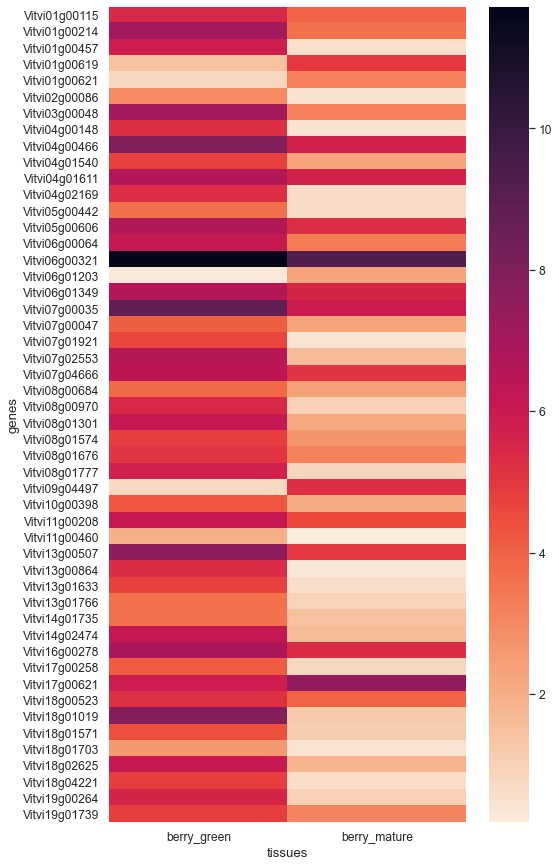

In [40]:
plt.figure(figsize = (8, 15))
sns.set(font_scale=1.1)
s = sns.heatmap(new_data_group_beries.transpose(), cmap='rocket_r')
s.set(xlabel='tissues', ylabel='genes')

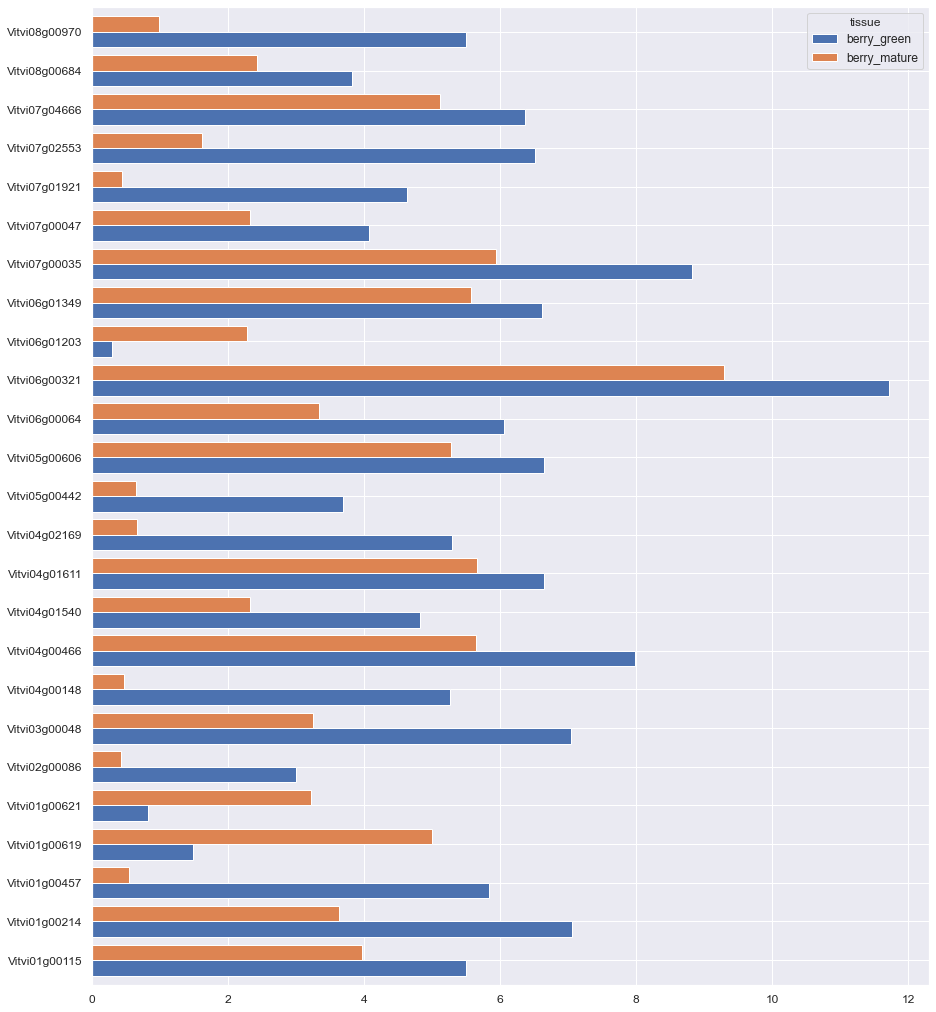

In [41]:
new_data_group_beries.iloc[:, :25].transpose().plot.barh(figsize=(15, 18),width=0.8,  fontsize=12)

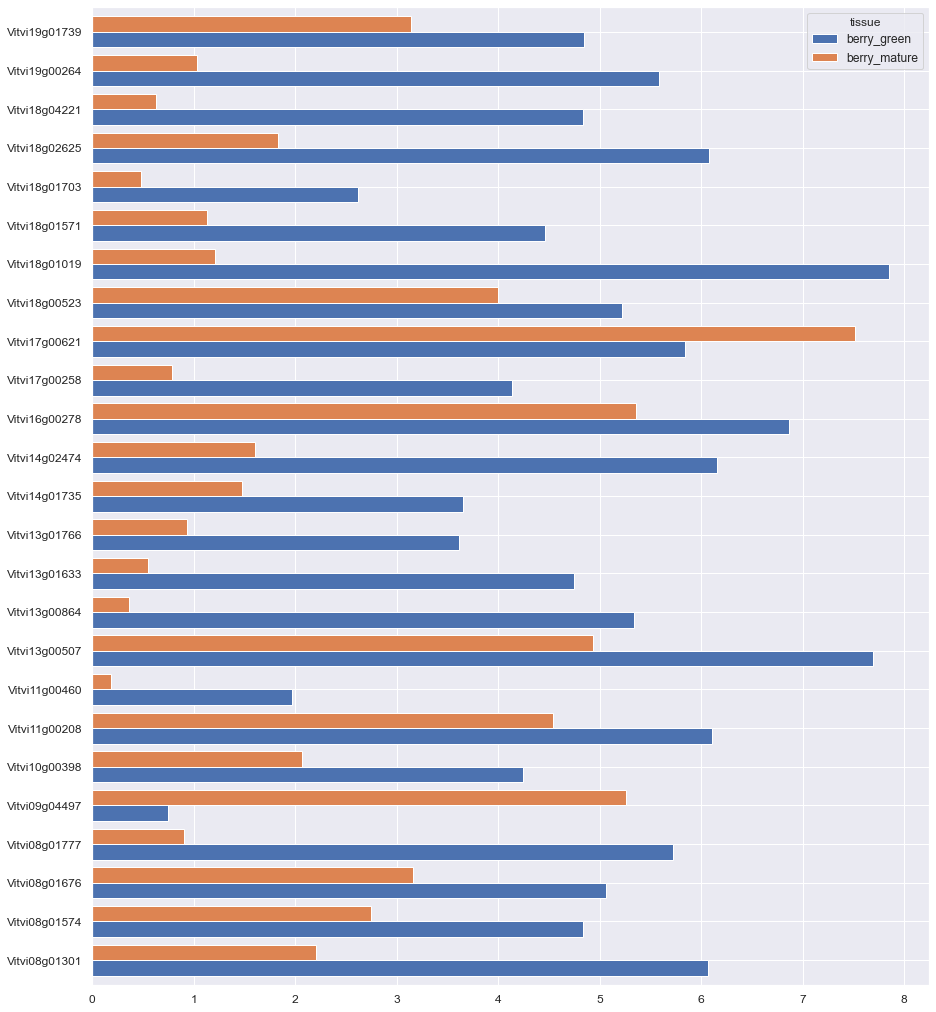

In [43]:
new_data_group_beries.iloc[:, 25:].transpose().plot.barh(figsize=(15, 18),width=0.8,  fontsize=12)